# Imports

In [1]:
using NLsolve
using LinearAlgebra
using Random
using RandomMatrices

In [2]:
import PyPlot
const plt = PyPlot;

In [5]:
include("common_code.jl");

In [6]:
include("clements_algorithm.jl");

# Test

In [9]:
dim = 20
d = Haar(2)
R = rand(d, dim);

In [10]:
@time D, c = clements_decomposition(R); sparsify.(D, 1e-6)

  0.034462 seconds (59.84 k allocations: 5.187 MiB, 49.84% gc time)


20×20 Matrix{Number}:
 -0.988939+0.14832im          0.0          …          0.0
          0.0         0.339061-0.940764im             0.0
          0.0                 0.0                     0.0
          0.0                 0.0                     0.0
          0.0                 0.0                     0.0
          0.0                 0.0          …          0.0
          0.0                 0.0                     0.0
          0.0                 0.0                     0.0
          0.0                 0.0                     0.0
          0.0                 0.0                     0.0
          0.0                 0.0          …          0.0
          0.0                 0.0                     0.0
          0.0                 0.0                     0.0
          0.0                 0.0                     0.0
          0.0                 0.0                     0.0
          0.0                 0.0          …          0.0
          0.0                 0.0                 

In [11]:
M = diagm(0 => ones(Complex, dim))
println("(m,n)   refl.  ϕ")
println("----------------------------")
for (l, i) in enumerate(c)
    println(" $(i[1]),$(i[1] + 1):   $(round(cos(i[3])^2, digits=2)),  ($(rationalize(round(i[4]/π, digits=3))))π")
    M = Tmn(dim, i[1], i[3], i[4]) * M
end

(m,n)   refl.  ϕ
----------------------------
 1,2:   0.52,  (477//500)π
 3,4:   0.35,  (1017//1000)π
 2,3:   0.19,  (51//50)π
 1,2:   0.3,  (651//1000)π
 5,6:   0.11,  (87//100)π
 4,5:   0.12,  (279//200)π
 3,4:   0.19,  (-4561//1000)π
 2,3:   0.16,  (619//500)π
 1,2:   0.1,  (57//50)π
 7,8:   0.83,  (203//200)π
 6,7:   0.27,  (1043//1000)π
 5,6:   0.23,  (267//500)π
 4,5:   0.04,  (1429//1000)π
 3,4:   0.01,  (659//500)π
 2,3:   0.03,  (501//500)π
 1,2:   0.16,  (789//1000)π
 9,10:   0.6,  (359//500)π
 8,9:   0.07,  (577//500)π
 7,8:   0.06,  (251//200)π
 6,7:   0.07,  (1257//1000)π
 5,6:   0.13,  (609//1000)π
 4,5:   0.13,  (347//250)π
 3,4:   0.22,  (667//1000)π
 2,3:   0.06,  (1479//1000)π
 1,2:   0.01,  (1219//1000)π
 11,12:   0.97,  (71//125)π
 10,11:   0.04,  (161//250)π
 9,10:   0.02,  (943//1000)π
 8,9:   0.16,  (-2413//1000)π
 7,8:   0.12,  (907//1000)π
 6,7:   0.0,  (817//1000)π
 5,6:   0.09,  (47//50)π
 4,5:   0.06,  (631//1000)π
 3,4:   0.26,  (503//1000)π
 2,3:   0.25,  

In [13]:
sparsify.(D * M - R)

20×20 Matrix{Float64}:
 -1.31061e-8  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0

In [14]:
norm(D * M - R)

8.124424251021922e-8

# symmetric 4-port beam splitter

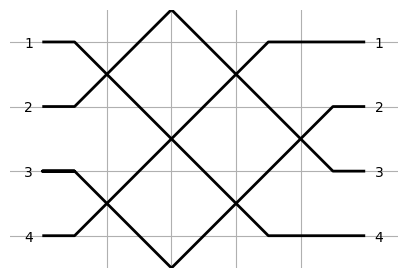

In [21]:
reference_plot(4, colors=false, save_plot_as=nothing, io_labels=true, figsize=5, grid=true)

In [15]:
# Symmetric 4-port beam splitters are constrained to the following form

ϕv = 0
U = ComplexF64[
    1         1         1         1
    1   exp(1im * ϕv)  -1  -exp(1im * ϕv)
    1        -1         1        -1
    1  -exp(1im * ϕv)  -1   exp(1im * ϕv)
]/2; sparsify.(U)

4×4 Matrix{Float64}:
 0.5   0.5   0.5   0.5
 0.5   0.5  -0.5  -0.5
 0.5  -0.5   0.5  -0.5
 0.5  -0.5  -0.5   0.5

In [16]:
dim = size(U)[1]
D, c = clements_decomposition(U, p0=[0.1, 0.15]); sparsify.(D, 1e-6)

4×4 Matrix{Float64}:
 1.0  0.0   0.0  0.0
 0.0  1.0   0.0  0.0
 0.0  0.0  -1.0  0.0
 0.0  0.0   0.0  1.0

In [17]:
M = diagm(0 => ones(Complex, dim))
println("(m,n)   refl.  ϕ")
println("----------------------------")
for (l, i) in enumerate(c)
    println(" $(i[1]),$(i[1] + 1):   $(round(cos(i[3])^2, digits=2)),  ($(rationalize(round(i[4]/π, digits=3))))π")
    M = Tmn(dim, i[1], i[3], i[4]) * M
end

(m,n)   refl.  ϕ
----------------------------
 1,2:   0.5,  (0//1)π
 3,4:   0.5,  (0//1)π
 2,3:   0.0,  (6//125)π
 1,2:   0.5,  (0//1)π
 3,4:   0.5,  (-6//125)π
 2,3:   1.0,  (0//1)π


In [18]:
sparsify.(D * M)

4×4 Matrix{Float64}:
 0.5   0.5   0.5   0.5
 0.5   0.5  -0.5  -0.5
 0.5  -0.5   0.5  -0.5
 0.5  -0.5  -0.5   0.5

In [19]:
norm(D * M - U)

5.388534756608808e-10

In [23]:
# Let's try and find the asymmetric bs version by eye based on these results
D = diagm(0 => [1, 1, 1, 1])

Ubuilt = sparsify.(
    D *
    Tmn(4, 2, 0, 0) *     # identity
    Tmn(4, 3, π/4, 0, convention="asymmetric") * 
    Tmn(4, 1, π/4, 0, convention="asymmetric") * 
    swap(4, 2, 3) * 
    Tmn(4, 3, π/4, 0, convention="asymmetric") * 
    Tmn(4, 1, π/4, 0, convention="asymmetric") 
    
)
convert(Array{Int}, 2* round.(Ubuilt, digits=2))
# Ubuilt

4×4 Matrix{Int64}:
 1   1   1   1
 1   1  -1  -1
 1  -1   1  -1
 1  -1  -1   1

## Construct unitary as illustrated in poster

In [ ]:
U_poster = 
Tmn(4, 2, 3, acos(√2/3), 0) *
Tmn(4, 1, 3, acos(√1/4), 0) *
Tmn(4, 2, 4, acos(√1/4), 0) *
Tmn(4, 2, acos(√1/3), 0) *
Tmn(4, 3, acos(√1/2), 0) *
Tmn(4, 1, acos(√1/2), 0)

4×4 Matrix{Any}:
 -0.665569+0.0im  -0.672942+0.0im  -0.161374+0.0im    0.279508+0.0im
 -0.572956+0.0im   0.655217+0.0im  -0.487587+0.0im  -0.0683458+0.0im
   0.38809+0.0im  -0.302983+0.0im  -0.823803+0.0im   -0.280956+0.0im
  0.279508+0.0im   0.161374+0.0im  -0.239929+0.0im    0.915569+0.0im

In [ ]:
sparsify.(U - U_poster)

4×4 Matrix{Number}:
 1.16557            1.17294    0.661374            0.220492
 1.07296   -0.655217+0.5im    -0.0124132  0.0683458-0.5im
 0.11191           -0.197017   1.3238             -0.219044
 0.220492  -0.161374-0.5im    -0.260071   -0.915569+0.5im

In [670]:
U_alt = 
Tmn(4, 2, 3, π, -π) *
Tmn(4, 3, 4, π/4, -π/2) *
Tmn(4, 1, 2, π/4, π) *
Tmn(4, 2, 3, π/2, π/2) *
Tmn(4, 3, 4, π/4, π) *
Tmn(4, 1, 2, π/4, π) 

4×4 Matrix{Any}:
  0.5-9.18485e-17im   0.5-9.18485e-17im  …  -0.5+0.0im
  0.5-9.18485e-17im   0.5+3.06162e-17im      0.5+6.12323e-17im
  0.5-6.12323e-17im  -0.5-3.7494e-33im       0.5-3.06162e-17im
 -0.5+6.12323e-17im   0.5+0.0im              0.5+3.06162e-17im

In [671]:
sparsify.(D * U_alt)

4×4 Matrix{Float64}:
  0.5   0.5  -0.5  -0.5
 -0.5  -0.5  -0.5  -0.5
  0.5  -0.5  -0.5   0.5
 -0.5   0.5  -0.5   0.5

In [672]:
sparsify.(U_alt * U_alt')

4×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0